# THE SPARKS FOUNDATION

### Data Science and Business Analytics 

# TASK 1 - Prediction using Supervised ML

***To predict percentage of the students based on the no. of study hours.* <br>
*This is a simple linear regression as it uses only two variables.***

## - Pandurang Choudhari

In [14]:
# importing Required Libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [15]:
# importing and reading the data
P_data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")

Data imported successfully


In [16]:
P_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [17]:
# Checking if there is any null value in the dataset so that we can visualize our data.
P_data.isnull== True or print ("Data can be visualised")

Data can be visualised


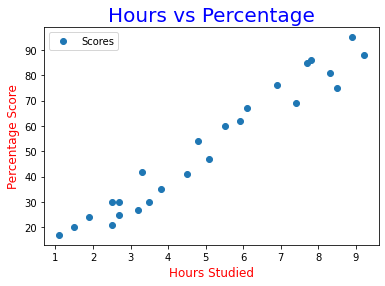

In [18]:
#plotting the score distribution in 2D graph
P_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage',size=20, color='Blue')  
plt.xlabel('Hours Studied',size=12, color='red')  
plt.ylabel('Percentage Score',size=12, color='red')  
plt.show()

***From the above scatter plot it looks like there is a positive relation between the hours studied and percentage of scores. So lets plot a regression line to confirm the correlation***

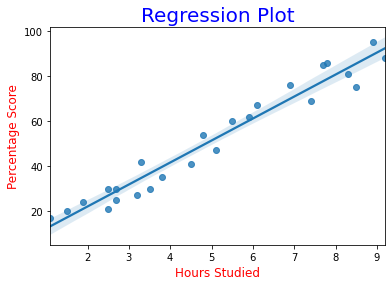

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [19]:
sns.regplot(x= P_data['Hours'], y= P_data['Scores'])
plt.title('Regression Plot',size=20, color='Blue')
plt.ylabel('Percentage Score', size=12, color='Red')
plt.xlabel('Hours Studied', size=12, color='Red')
plt.show()
print(P_data.corr())


***It is confirmed that data is positively correlated***

## Training the Model

### 1. Splitting the Data

In [20]:
# defining x and y from the Data 
X = P_data.iloc[:, :-1].values  
y = P_data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### 2. Fitting the datain to Model

In [21]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


## Predicting the Percentage of Marks

In [22]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


## Comparing the Predicted Marks with the Actual Marks¶

In [10]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Visually Comparing the Predicted Marks with the Actual Marks

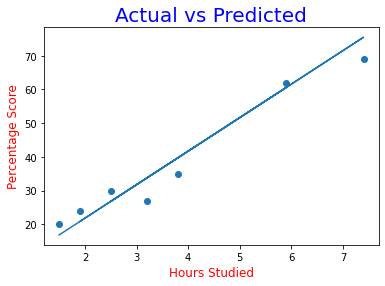

In [11]:
plt.scatter(x=val_X, y=val_y)
plt.plot(val_X, pred_y)
plt.title('Actual vs Predicted', size=20, color='Blue')
plt.ylabel('Percentage Score', size=12, color='red')
plt.xlabel('Hours Studied', size=12, color='red')
plt.show()

## Evaluating the Model

In [12]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


**Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.**

## What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [13]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


**According to the above regression model, if a student studies for 9.25 hours a day then he/she is likely to score 93.89 marks.**